#  Investigating Income Disparities among Racial and Gender Groups

By Eric Zhang, Primo Huang, Edmund Chu, Prajna Nayak

Group 14: Project Proposal

# Introduction

Income inequality has long been an issue of interest and concern to people around the world. These differences have significant implications for individuals’ quality of life, access to opportunities, and overall well-being. Two of the major drivers of economic disparity is ethnicity and gender, as different groups tend to have different socioeconomic outcomes. Bertrand (2003) found that even having ethnic-sounding names affected the call back negatively compared to White sounding names, thus affecting income and job prospects.

This project proposal attempts to address an important question: Is there a significant difference in the likelihood of individuals earning an income greater than $50,000 ('>50K') among different racial and gender groups?" Akee et al(2017) have shown evidence that there are systematic differences between race across income however we will take a step further by examining the effect of gender. Specifically, we will investigate the income disparities among White and Black individuals, further stratified by gender. Our response variable of interest is the proportion of individuals with income '>50K' within each subgroup. Our goal is to explore this question more thoroughly using statistical methods to gain valuable insights into the income inequality of our study population.

We use data from https://archive.ics.uci.edu/dataset/20/census+income . This dataset is a sample from the population of the USA which shows whether or not an individual earns more than $50,000 along with their sex, race, ages, work class, education, marital status, occupation among other variables. 
We plan to use Hypothesis testing to figure out the likelihood of individuals earning >50K based on race and sex. We will have 4 hypotheses overall to test these and use a z-test.

# Preliminary Results

## Data Loading

First we load all the necessary libraries for us to analyze our data

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

We will start by loading our data from the github repository and giving the columns names. As seen below, we have a sample of 32561 people and information on their age, work class, education, sex, race, whether they earn >50K and others.

In [3]:
income_col_names <- c("age", "work_class", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income_status")
income_main <- read_csv("https://raw.githubusercontent.com/Praj-na/stat201-groupproject/main/income.csv",col_names=income_col_names)
head(income_main)

Rows: 32561 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): work_class, education, marital_status, occupation, relationship, ra...
dbl (6): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_status
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Data Cleaning and Wrangling

We will now start by filtering out the sample dataset with the columns we need to answer our research question. Since we are exploring race and sex effects on income, we will need those columns. We will also additionally filter out age, work class and other factors that might affect whether or not an individual earns more than 50K.

In [4]:
income_want <- c("age", "work_class", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country", "income_status")
income = income_main[income_want]

head(income)

age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_status
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


## Data Visualization

Let's start by making graphs that can help us better understand the dataset and how we can go about exploring it. The first graph will be a bar graph comparing the number of people earning <= 50K and the number of people earning >50K.

### Income Distribution

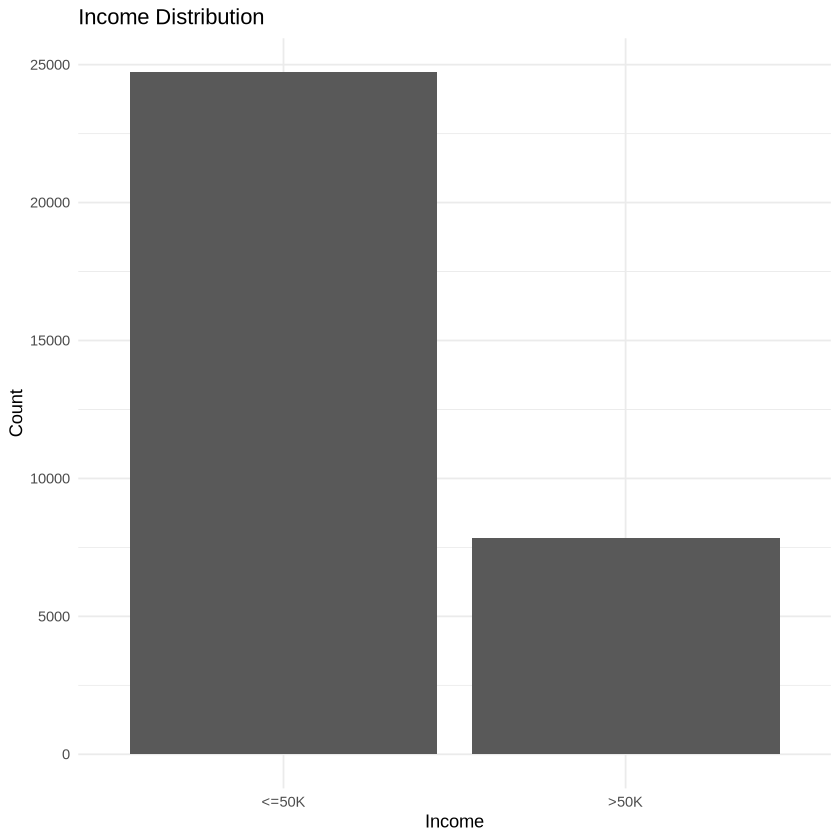

In [5]:
income_dist <- income |>
ggplot(aes(x = income_status)) +
geom_bar() +
labs(
    title = "Income Distribution",
    x = "Income",
    y = "Count"
  ) +
  theme_minimal()

income_dist


### Income Status by Work-Class

Below is a graph that shows the different counts of Work Class, vs their income status, for each workclass we have clearly demonstrated the count and hence we can observe that Private Class has the highest population with the the majority of workers making below 50k, however this is a trned that is continuously obserrved throughout all the classes, except for the Never-worked class, in which case, they all earn 0.

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


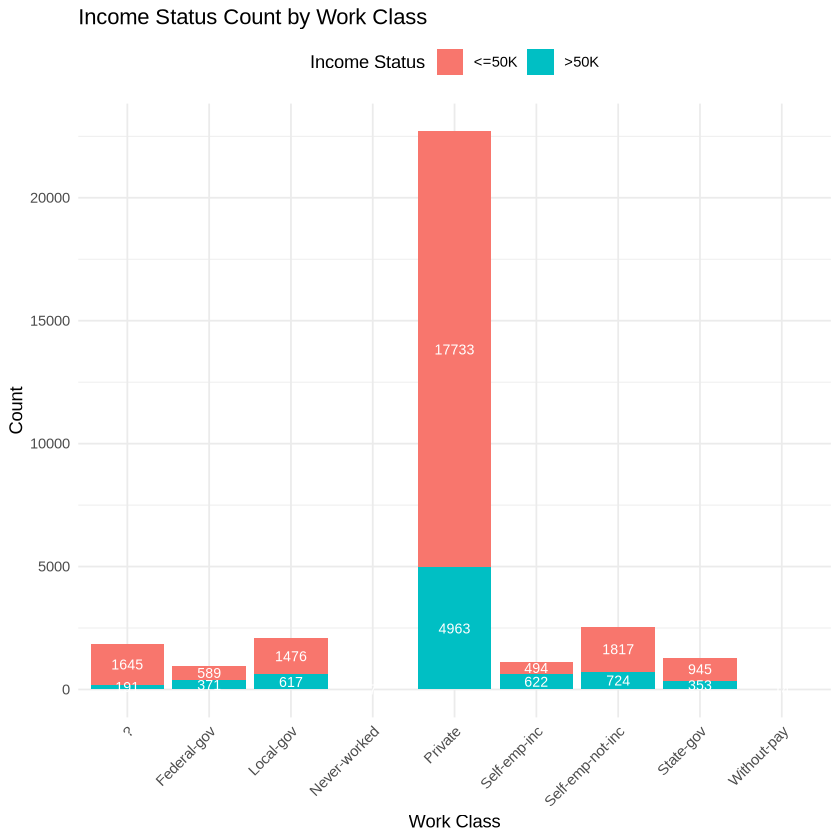

In [6]:
work_class_graph <- ggplot(income, aes(x = work_class, fill = income_status)) +
  geom_bar() +
  geom_text(stat = "count", aes(label = ..count..),
            position = position_stack(vjust = 0.5), color = "white", size = 3) +
  labs(x = "Work Class", y = "Count", fill = "Income Status") +
  ggtitle("Income Status Count by Work Class") +
  theme_minimal() +
  theme(legend.position = "top", axis.text.x = element_text(angle = 45, hjust = 1))

# Adjust the dimensions of the plot
ggsave("your_plot.png", plot = work_class_graph, width = 10, height = 6, units = "in", dpi = 300)

work_class_graph

### Income Status By Race

We will also make a Race vs Income Status graph to help us visualize what we may expect from our findings. This graph shows the proportions of the each income Status for each Race category, Statistical testing can be implied to analyze the differences between the proportions of income level vs each race.

`summarise()` has grouped output by 'race'. You can override using the
`.groups` argument.


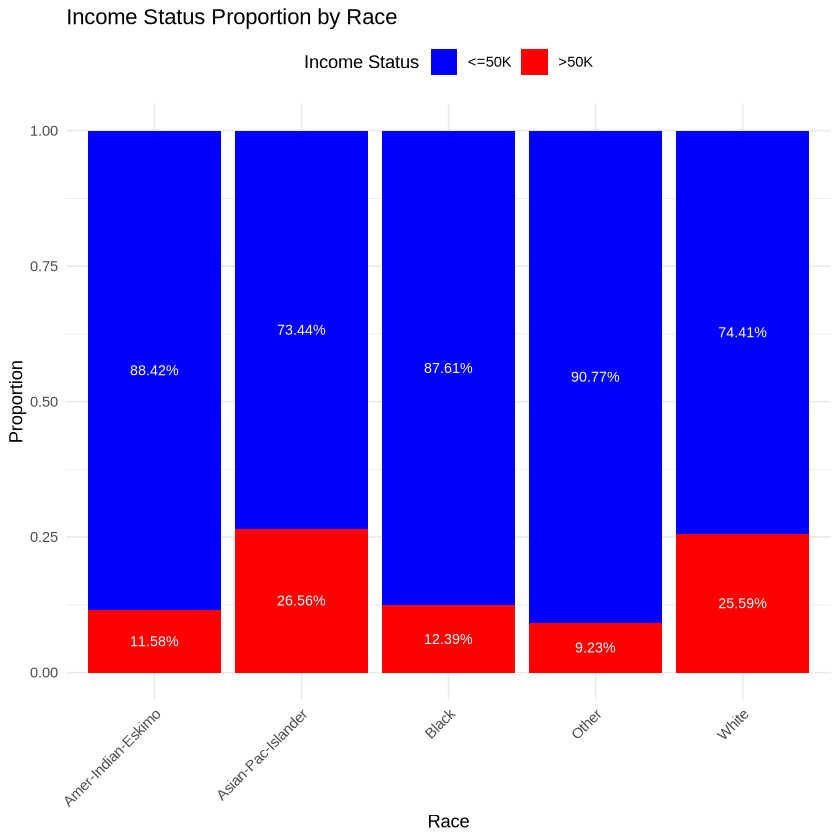

In [7]:
income %>%
  group_by(race, income_status) %>%
  summarise(count = n()) %>%
  group_by(race) %>%
  mutate(proportion = count / sum(count)) -> race_proportions

race_graph <- ggplot(race_proportions, aes(x = race, fill = income_status)) +
  geom_bar(aes(y = proportion), position = "fill", stat = "identity") +
  geom_text(aes(label = scales::percent(proportion), y = proportion),
            position = position_stack(vjust = 0.5), color = "white", size = 3) +
  labs(x = "Race", y = "Proportion", fill = "Income Status") +
  ggtitle("Income Status Proportion by Race") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Adjust the dimensions of the plot
ggsave("your_race_plot.png", plot = race_graph, width = 10, height = 6, units = "in", dpi = 300)

race_graph

We can see that there is a huge difference between the number of people earning <= 50K and number of people earning >50K across all races. We can also see that Since we can see that the the majority of the sample is Black or White, we will use these 2 races in our hypothesis tests. 

### Income Status by Gender

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


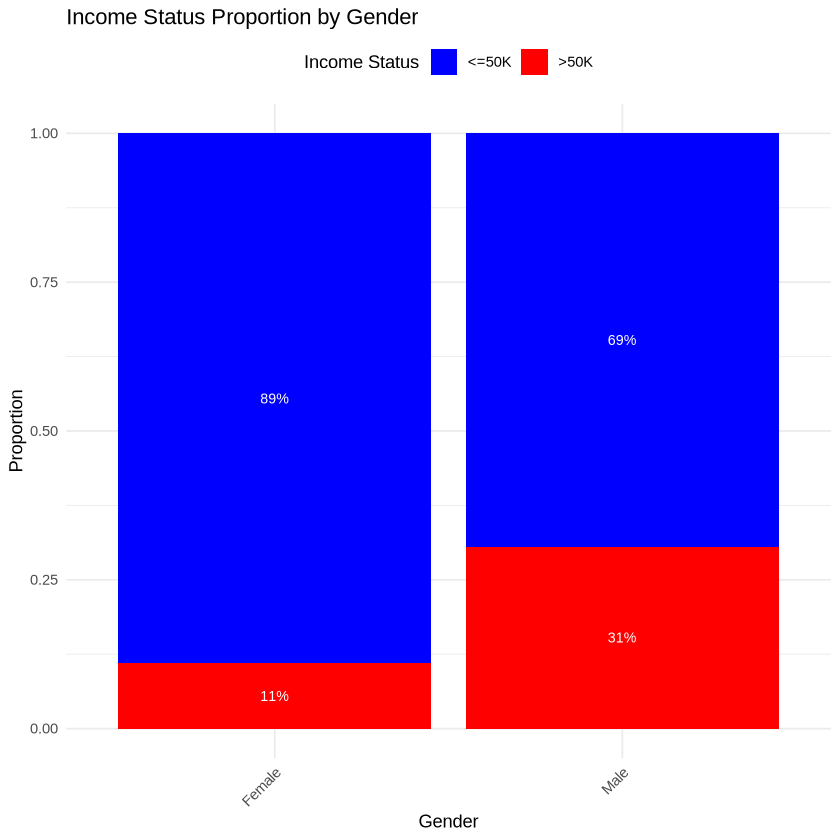

In [8]:
income %>%
  group_by(sex, income_status) %>%
  summarise(count = n()) %>%
  group_by(sex) %>%
  mutate(proportion = count / sum(count)) -> sex_proportions

sex_graph <- ggplot(sex_proportions, aes(x = sex, fill = income_status)) +
  geom_bar(aes(y = proportion), position = "fill", stat = "identity") +
  geom_text(aes(label = scales::percent(proportion), y = proportion),
            position = position_stack(vjust = 0.5), color = "white", size = 3) +
  labs(x = "Gender", y = "Proportion", fill = "Income Status") +
  ggtitle("Income Status Proportion by Gender") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Adjust the dimensions of the plot
ggsave("your_sex_plot.png", plot = sex_graph, width = 10, height = 6, units = "in", dpi = 300)

sex_graph

### Income Status by Education

Below is th Education vs Income Status, with the count labeled, we can see that some, there can necessarily a correlation between education level and income class, as we can see the highere the education, the more significant the increase in proportion of the higher income class, with doctorate and prof-school having very similar amounts, this is where statistical testin may help. Furthermore, at lower education levels, they may not follow the general trend when compared to each other such as 7-8th grade having a higher income class proportion than 9th grade, but compared to the other education levels once we HS grad, they are all similarly low percentage in the high income bracket.

`summarise()` has grouped output by 'education'. You can override using the
`.groups` argument.


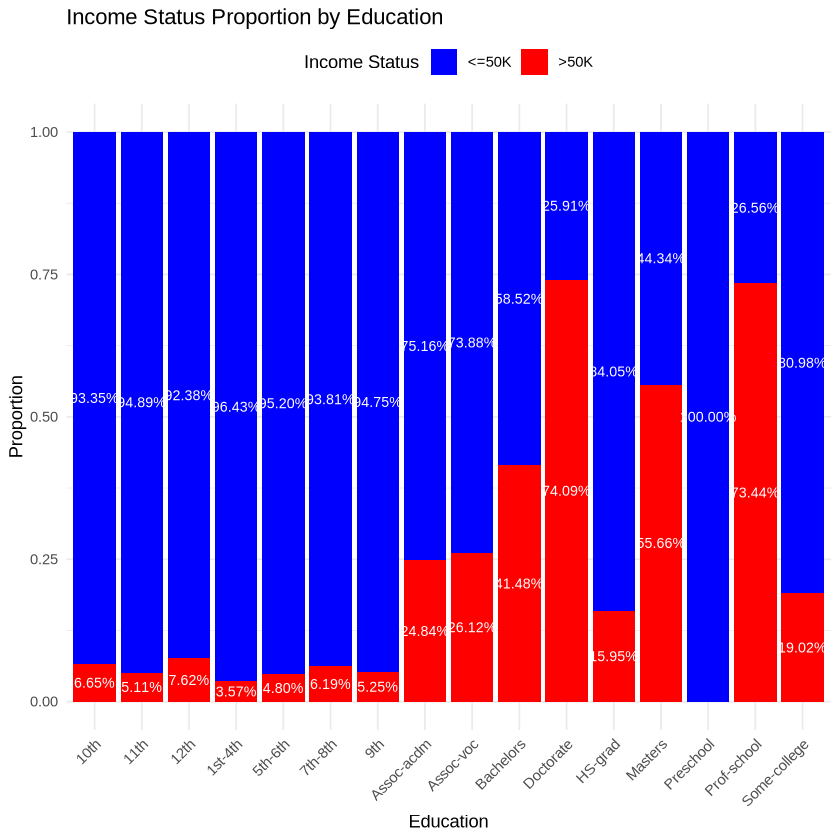

In [9]:
income %>%
  group_by(education, income_status) %>%
  summarise(count = n()) %>%
  group_by(education) %>%
  mutate(total_count = sum(count),
         proportion = count / total_count) -> income_proportions

education_graph <- ggplot(income_proportions, aes(x = education, fill = income_status)) +
  geom_bar(aes(y = proportion), position = "fill", stat = "identity") +
  geom_text(aes(label = scales::percent(proportion), y = proportion),
            position = position_stack(vjust = 0.5), color = "white", size = 3) +
  labs(x = "Education", y = "Proportion", fill = "Income Status") +
  ggtitle("Income Status Proportion by Education") +
  scale_fill_manual(values = c("blue", "red")) +
  theme_minimal() +
  theme(legend.position = "top") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Adjust the dimensions of the plot
ggsave("your_education_plot.png", plot = education_graph, width = 12, height = 8, units = "in", dpi = 300)

education_graph


We can see that there is a huge change in the proportions of individuals earning >5Ok among males and the proportion of individuals earning >50K among females. The number of males >50K is significantly higher than the number of females earning >50K. Across both genders we also see that there is a significant difference between the proportion of individuals earning >50K and the proportion of individuals earning <=50K.

# Methods

Plots and estimates alone do not quantify the statistical significance of the observed differences. Stakeholders need to know whether the differences are likely to be real or if they could have occurred by random chance. In order to provide a more robust analysis, we will plan to do the following.
In the first step, we plan to use Z-test for the proportion of individuals earning >50K among different racial groups, using the following steps:

## Hypothesis Testing with Z-Test for Location Parameter (Proportion of individuals earning >50K in the black and white racial groups):

We will start by specifying our hypothesis:

<strong>  Null Hypothesis (H0 location): </strong> There is no significant difference in the proportion of individuals with income >50K among different racial groups.

    - H0_location: p1(>50K) = p2(>50K) = p3(>50K) = ... (where p1, p2, p3, etc. represent the proportions of individuals with income >50K for each racial group). 
      
<strong> Alternative Hypothesis (H1 location): <strong> There is a significant difference in the proportion of individuals with income >50K among different racial groups.

    - H1_location: At least one proportion of income >50K differs from the others.

Now, we can start our hypothesis tests. First, below is the dataset with race, and income status, filtered to just black and white individuals.

In [127]:
income_race <- income %>%
    filter(race %in% c("White", "Black")) %>%
    select(race, income_status)  
    

head(income_race)

race,income_status
<chr>,<chr>
White,<=50K
White,<=50K
White,<=50K
Black,<=50K
Black,<=50K
White,<=50K


Here we calculate the total number of blacks and whites in the dataset.

In [128]:
n_black <- sum(income_race$race == "Black")
n_white <- sum(income_race$race == "White")

cat("There are", n_black, "Black individuals in this dataset\n")
cat("There are", n_white, "White individuals in this dataset\n")

There are 3124 Black individuals in this dataset
There are 27816 White individuals in this dataset


Then, we calculate the black sample proportion ($\hat{p}_{black}$), white sample proportion ($\hat{p}_{white}$) and the pooled proportion ($\hat{p}_{race}$)

In [129]:
phat_black <- income_race %>%
    filter(race == "Black", income_status == ">50K") %>%
    summarize(phat = n()/n_black) %>%
    pull()

phat_white <- income_race %>%
    filter(race == "White", income_status == ">50K") %>%
    summarize(phat = n()/n_white) %>%
    pull()

phat_race <- (n_black*phat_black + n_white*phat_white) / nrow(income_race)

cat("Black sample proportion = ", phat_black, "\n")
cat("White sample proportion = ", phat_white, "\n")
cat("Pooled sample proportion = ", phat_race)


Black sample proportion =  0.1238796 
White sample proportion =  0.2558599 
Pooled sample proportion =  0.2425339

Finally, we calculate the test statistic and use it to obtain the p-value 

In [130]:
test_statistic_race <- (phat_black - phat_white) / 
    sqrt(phat_race*(1-phat_race))/nrow(income_race)
    
p_value_race <- pnorm(test_statistic_race, lower.tail = FALSE)

cat("Test Statistic = ", test_statistic_race, "\n")
cat("P-value = ", p_value_race)

Test Statistic =  -9.952242e-06 
P-value =  0.500004

In [131]:
summary <- 
    tidy(prop.test(x = c(n_black*phat_black, n_white*phat_white), 
              n = c(n_black, n_white), 
              correct = FALSE))
summary

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1238796,0.2558599,266.298,7.273886e-60,1,-0.1446197,-0.1193409,2-sample test for equality of proportions without continuity correction,two.sided


<strong> Conclusion: <strong>

Since the p-value is 0.5, it is above the significance level. Therefore, we conclude that at a 5% significance level, we do not reject the null-hypothesis that there is no significant difference in the proportion of individuals with income >50K among black and white races.

## Hypothesis Testing with Z-Test for Location Parameter (Proportion of individuals earning >50K in each gender group):
Once again, first start by specifying hypotheses below:

<strong> Null Hypothesis (H0_location): </strong> There is no significant difference in the proportion of individuals with income >50K among males and females.

        - H0_location: p1(>50K) = p2(>50K) (where p1, p2 represent the proportions of individuals with income >50K for male and female respectively).
        

<strong> Alternative Hypothesis (H1_location):  </strong> There is a significant difference in the proportion of individuals with income >50K among  males and females.

        - H1_location: p1(>50K) not equal to p2(>50K)

First, let's start by displaying the dataset with sex and income status.

In [132]:
income_sex <- income %>%
    select(sex, income_status)

head(income_sex)

sex,income_status
<chr>,<chr>
Male,<=50K
Male,<=50K
Male,<=50K
Male,<=50K
Female,<=50K
Female,<=50K


Here we calculate the total number of males and females in the dataset.

In [133]:
n_male <- sum(income_sex$sex == "Male")
n_female <- sum(income_sex$sex == "Female")

cat("There are", n_male, "males in this dataset\n")
cat("There are", n_female, "females in this dataset\n")

There are 21790 males in this dataset
There are 10771 females in this dataset


Then, we calculate the male sample proportion ($\hat{p}_{male}$), female sample proportion ($\hat{p}_{female}$) and the pooled proportion $\hat{p}$

In [134]:
phat_male <- income_sex %>%
    filter(sex == "Male", income_status == ">50K") %>%
    summarize(phat = n()/n_male) %>%
    pull()

phat_female <- income_sex %>%
    filter(sex == "Female", income_status == ">50K") %>%
    summarize(phat = n()/n_female) %>%
    pull()

phat <- (n_male*phat_male + n_female*phat_female) / (n_male + n_female)

cat("Male sample proportion = ", phat_male, "\n")
cat("Female sample proportion = ", phat_female, "\n")
cat("Pooled sample proportion = ", phat)

Male sample proportion =  0.3057366 
Female sample proportion =  0.1094606 
Pooled sample proportion =  0.2408096

Finally, we calculate the test statistic and use it to obtain the p-value 

In [135]:
test_statistic <- (phat_male - phat_female) / sqrt(phat*(1-phat)*(1/n_male + 1/n_female))
p_value <- pnorm(test_statistic, lower.tail = FALSE) *2

cat("Test Statistic = ", test_statistic, "\n")
cat("P-value = ", p_value)

Test Statistic =  38.9729 
P-value =  0

Below is a summary

In [136]:
summary <- 
    tidy(prop.test(x = c(n_male*phat_male, n_female*phat_female), 
              n = c(n_male, n_female), 
              correct = FALSE))
summary

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.3057366,0.1094606,1518.887,0,1,0.1877797,0.2047722,2-sample test for equality of proportions without continuity correction,two.sided


<strong> Conclusion: </strong> 
    <p>
    Since the p-value is 0, it is below the significance level. Therefore, we conclude that at a 5% significance level, we reject the null-hypothesis that there is no significant difference in the proportion of individuals with income >50K among males and females


## Confidence Intervals with Bootstrapping:
Let's first specify our parameter of interest:

<strong> Parameter of Interest: </strong> The proportion of individuals with income >50K for each racial group and gender group.

Now, we will begin by filtering our data to the required columns only. From there, we can calculate the proportions of black and white individuals, further stratified by gender. 

In [137]:
filtered_data <- income %>%
  filter(race %in% c("Black", "White")) %>%
select(race, sex, income_status)


proportions <- filtered_data %>%
  group_by(race, sex, income_status) %>%
  summarise(count = n()) %>%
  group_by(race, sex) %>%
  mutate(proportion = count / sum(count)) %>%
  filter(income_status == ">50K" & !is.na(proportion)) %>%
  select(race, sex, proportion)
  
  head(proportions)

`summarise()` has grouped output by 'race', 'sex'. You can override using the
`.groups` argument.


race,sex,proportion
<chr>,<chr>,<dbl>
Black,Female,0.05787781
Black,Male,0.18929254
White,Female,0.11895395
White,Male,0.31756545


Having had the proportions done now, we can do bootstrapping from our sample and use a bootstrapping function to calculate the proportion. Let's start by taking a single sample of size 700. We will set seed to 1 so that each time the function runs, the same sample is used.  

In [147]:
set.seed(1)

# Take a single sample of size 800
single_sample <- filtered_data %>%
  rep_sample_n(size = 700, reps = 1, replace = TRUE)

# Display the single sample
head(single_sample)

# Resample (bootstrap) the single sample, creating multiple simulated datasets
num_bootstraps <- 1000  # Number of bootstraps
bootstrap_samples <- single_sample %>%
  rep_sample_n(size = nrow(single_sample), reps = num_bootstraps, replace = TRUE)

head(bootstrap_samples)

replicate,race,sex,income_status
<int>,<chr>,<chr>,<chr>
1,White,Male,<=50K
1,White,Female,<=50K
1,White,Male,<=50K
1,Black,Male,<=50K
1,White,Male,>50K
1,White,Female,<=50K


New names:
• `replicate` -> `replicate...1`
• `replicate` -> `replicate...2`


replicate...1,replicate...2,race,sex,income_status
<int>,<int>,<chr>,<chr>,<chr>
1,1,Black,Male,<=50K
1,1,White,Female,<=50K
1,1,White,Male,<=50K
1,1,White,Male,<=50K
1,1,White,Female,<=50K
1,1,White,Male,>50K


We will now calculate the proportions in each sample. 

In [148]:
# Calculate proportions in each resampled dataset for all income_status values
bootstrap_proportions <- bootstrap_samples %>%
  group_by(replicate...1, replicate...2, race, sex) %>%
  summarise(count = sum(income_status == ">50K")) %>%
  mutate(proportion = count / sum(count))

# Display the proportions for each racial and gender group in bootstrapped data
head(bootstrap_proportions)


`summarise()` has grouped output by 'replicate...1', 'replicate...2', 'race'.
You can override using the `.groups` argument.


replicate...1,replicate...2,race,sex,count,proportion
<int>,<int>,<chr>,<chr>,<int>,<dbl>
1,1,Black,Female,5,0.2941176
1,1,Black,Male,12,0.7058824
1,1,White,Female,34,0.1920904
1,1,White,Male,143,0.8079096
2,1,Black,Female,1,0.1000000
2,1,Black,Male,9,0.9000000


We can see that the proportions for black females, black males, white females and white males have been calculated for each replicate. Let's move on to calculate the confidence intervals now using these bootstrapped samples. We can start by filtering our data for each gender and race. 

In [149]:
# Filter data for different gender and racial groups
black_female <- filter(bootstrap_proportions, race == "Black", sex == "Female")
black_male <- filter(bootstrap_proportions, race == "Black", sex == "Male")
white_female <- filter(bootstrap_proportions, race == "White", sex == "Female")
white_male <- filter(bootstrap_proportions, race == "White", sex == "Male")

Now, let's actually calculate the confidence intervals, we will store each of them below. We can do this easily by defining a function that can be used to calculate the confidence intervals for each group and then passing the relevant data to them. 

In [150]:
# Function to calculate confidence intervals
calculate_confidence_intervals <- function(data) {
  mean_prop <- mean(data$proportion)
  std_err <- sd(data$proportion) / sqrt(nrow(data))
  margin_error <- qnorm(0.975) * std_err  # For a 95% confidence interval
  lower_bound <- mean_prop - margin_error
  upper_bound <- mean_prop + margin_error
  return(c(lower_bound, upper_bound))
}

# Calculate confidence intervals for different groups
black_female_conf_interval <- calculate_confidence_intervals(black_female)
black_male_conf_interval <- calculate_confidence_intervals(black_male)
white_female_conf_interval <- calculate_confidence_intervals(white_female)
white_male_conf_interval <- calculate_confidence_intervals(white_male)


Finally, let's print out the confidence intervals to see what our results give. 

In [151]:
# Print confidence intervals for different groups
cat("Confidence Intervals for Black Females:", black_female_conf_interval, "\n")
cat("Confidence Intervals for Black Males:", black_male_conf_interval, "\n")
cat("Confidence Intervals for White Females:", white_female_conf_interval, "\n")
cat("Confidence Intervals for White Males:", white_male_conf_interval, "\n")

Confidence Intervals for Black Females: 0.1767782 0.1923575 
Confidence Intervals for Black Males: 0.8076425 0.8232218 
Confidence Intervals for White Females: 0.2075504 0.2112508 
Confidence Intervals for White Males: 0.7887492 0.7924496 


Now let's explore these confidence intervals and what they mean in this scenario. 

<strong> Black Females (95% confidence interval: 0.1768 - 0.1924): </strong> Between 17.68% and 19.24% of black females are estimated to have an income greater than 50K, with 95% confidence. This interval suggests a relatively narrower range compared to other groups.

<strong> Black Males (95% confidence interval: 0.8076 - 0.8232): </strong> Between 80.76% and 82.32% of black males are estimated to have an income greater than 50K, with 95% confidence. This interval implies a significantly higher estimated proportion compared to the other groups, with a notably wider range.

<strong> White Females (95% confidence interval: 0.2076 - 0.2113): </strong> Between 20.76% and 21.13% of white females are estimated to have an income greater than 50K, with 95% confidence. This interval indicates a relatively lower proportion compared to the other groups.

<strong> White Males (95% confidence interval: 0.7887 - 0.7924): </strong> Between 78.87% and 79.24% of white males are estimated to have an income greater than 50K, with 95% confidence. This interval suggests a significantly higher estimated proportion, similar to black males.

These confidence intervals allow us to compare the estimated proportions of high-income individuals across different gender and racial groups. If the intervals of two groups do not overlap, it indicates a statistically significant difference between those groups regarding the proportion of individuals with higher income. In this case, the confidence intervals for black males and white males do not overlap, suggesting a potential statistically significant difference in their estimated proportions of high-income earners.

## Discussion and Further Implications:
### Hypothesis Testing for both groups:

The statistical test comparing income proportions between black and white races did not provide evidence to reject the null hypothesis. Hence, it suggests no significant difference in the proportion of high-income earners between these racial groups.

On the other hand, the statistical test comparing income proportions between males and females led to rejecting the null hypothesis. It indicates a significant difference in the proportion of high-income earners between genders, with males having a significantly higher proportion.

### Bootstrapping for Confidence Intervals:

The bootstrapped confidence intervals for different racial and gender groups showed varying estimated proportions of high-income earners.
Interpretation: Black males exhibited the highest estimated proportion (80.76% - 82.32%) of high-income earners, significantly higher compared to other groups. White males also had a notably high estimated proportion (78.87% - 79.24%). In contrast, black females and white females had lower estimated proportions (17.68% - 19.24% and 20.76% - 21.13%, respectively).

Implications: The findings suggest substantial disparities in income distribution among racial and gender groups. Black males and white males stand out with higher estimated proportions of high-income earners compared to females and other racial groups. The observed disparities warrant further investigation into socioeconomic factors contributing to these differences. Future research could explore educational attainment, occupational patterns, and systemic factors influencing income distribution among diverse demographic groups.

### Expectations vs. Findings:

The results aligned with expectations concerning the significant disparity between males and females. However, the lack of significant differences between black and white racial groups contradicted initial expectations, indicating a need for more nuanced analyses or larger sample sizes.
### Future Research Directions:

Investigate additional variables such as education level, occupation, geographic location, and systemic biases to provide a more comprehensive understanding of income disparities.
Explore temporal trends over different periods to identify changes in income distribution among racial and gender groups over time.
Assess policy implications and potential interventions to mitigate income disparities and promote equity among various demographic groups.
In summary, this analysis highlights substantial disparities in income distribution among different racial and gender groups. It emphasizes the importance of exploring these disparities further and implementing policies that promote fairness and equality in income opportunities across diverse demographic segments.


## References
1. Akee, R., Jones, M., & Porter, S. (2017). Race matters: Income shares, income inequality, and income mobility for all U.S. races. NATIONAL BUREAU OF ECONOMIC RESEARCH. https://doi.org/10.3386/w23733 
The researches examine the universe of tax filers for the US over the period of 2000 - 2014 by race and ethnic group. Through the use of restricted IRS tax data and US Census race and ethnicity data, they have found that there are large differences in income shares across race and ethnic groups over the time period. There is specifically a persistence of disadvantage of certain minority groups relative to Whites at every point in the income distribution. Blacks, Hispanics, and American Indians tend to be clustered at the low end while White and Asians tend to accrue higher income shares at all points in time.  
This paper shows the systematic differences between races and how there is a significant difference between an individuals race and their income and how this difference is persistent across a significant period of time.

2. Bertrand, M. (2003). Are Emily and Greg more employable than lakisha and Jamal? A field experiment on labor market discrimination. NATIONAL BUREAU OF ECONOMIC RESEARCH. https://doi.org/10.3386/w9873 

This was a field experiment conducted to measure racial discrimination in the labor market by responding with fictitious resumes to help wanted ads in Boston & Chicago newspaper. The researchers assigned resumes either a very African American sounding name or a very White Sounding name. The results show statistically significant discrimination against African-American names: White names receive 50% higher callbacks for interviews and that race affects the benefits of a better resume. 

These results show that race already inherecently affect call back and thus the likelihood of obtaining a job which consequently can impact the average income a race group obtains.
